In [1]:
from pickletools import optimize
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

In [3]:
training_images, testing_images = training_images / 255.0, testing_images / 255.0


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


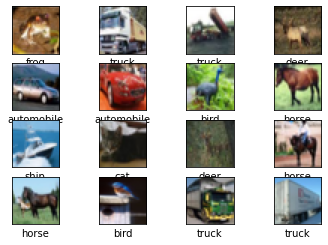

In [5]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])

plt.show()

In [6]:
# training_images = training_images[:20000]
# training_labels = training_labels[:20000]
# testing_images = testing_images[:4000]
# testing_labels = testing_labels[:4000]

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5474 - accuracy: 0.4297 - val_loss: 1.3515 - val_accuracy: 0.5174
Epoch 2/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.1906 - accuracy: 0.5745 - val_loss: 1.1026 - val_accuracy: 0.6057
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0491 - accuracy: 0.6304 - val_loss: 1.0527 - val_accuracy: 0.6293
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9516 - accuracy: 0.6655 - val_loss: 0.9637 - val_accuracy: 0.6640
Epoch 5/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8845 - accuracy: 0.6903 - val_loss: 0.9145 - val_accuracy: 0.6824
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8345 - accuracy: 0.7055 - val_loss: 0.8894 - val_accuracy: 0.6940
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7854 - accuracy: 0.7234 - val_loss: 0.9386 -

In [9]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


313/313 [==============================] - 2s 7ms/step - loss: 0.8591 - accuracy: 0.7065
Loss: 0.8590643405914307
Accuracy: 0.7064999938011169


In [10]:
model.save('image_classifier.model')

INFO:tensorflow:Assets written to: image_classifier.model\assets
